# Problem 3 ciał - sprawozdanie

Celem zadań jest implementacja modelu przybliżającego oddziaływania grawitacyjnego 2 i 3 ciał. Całość relizuję w języku Python z pomocą bibliotek *numpy* i *matplotlib*. Główne założenie to przybliżenie równań ruchu i prędkości za pomocą:
$$\bar{v}_i^{t+1}=\bar{v}_i^t+\frac{\Delta t}{m_i} \bar{F}_i$$
$$\bar{x}_i^{t+1}=\bar{x}_i^t+\Delta t\; \bar{v}_i^t$$
gdzie:
* $\Delta t$ - krok czasowy
* $F$ - siła od innych ciał działająca na ciało i

## Implementacja
Klasa *Planet* reprezentuje obiekty, które będą oddziaływały grawitacyjnie na płaszczyźnie. Przechowuje swoją masę, aktualne współrzędne i aktualne predkości w dwóch osiach. Trzy dodatkowe metody są wykorzystywane w głównej funkcji *n_body*.

Wspomniana funkcja *n_body* realizuje ruch obiektów *Planet*. Iterując kolejno po krokach czasowych i wszystkich obiektach funkcja nadpisuje współrzedne i prędkości każdego obiektu. Dodatkowo umożliwia zablokowanie jednego obiektu aby się nie poruszał, rysowanie trajektorii oraz badanie odchylenia trajektorii od okręgu.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
G=1
class Planet:
    def __init__(self, mass, x0, y0, vx0, vy0):
        self.m = mass
        self.x = x0
        self.y = y0
        self.vx = vx0
        self.vy = vy0
    
    def x_diff(self, other):
        return self.x - other.x
        
    def y_diff(self, other):
        return self.y - other.y
    
    def r_module(self, other):
        return np.sqrt( self.x_diff(other)**2 + self.y_diff(other)**2 )
        
def n_body(time_step, steps, planets, plot_flag=False, fixed_flag=False, return_v_flag=False):
    if plot_flag:
        x_plot = [[],[],[]]
        y_plot = [[],[],[]]
    if return_v_flag:
        vx_plot = [[],[],[]]
        vy_plot = [[],[],[]]
    dt = time_step
    for t in range(steps):
        t1 = t * dt
        
        rng = range(len(planets))
        if fixed_flag:
            rng = range(1,len(planets)) # ciało 0 zostaje nieruchome
        
        for i in rng:
            if plot_flag:
                x_plot[i].append(planets[i].x)
                y_plot[i].append(planets[i].y)
            if return_v_flag:
                vx_plot[i].append(planets[i].vx)
                vy_plot[i].append(planets[i].vy)
            F_ix = 0
            F_iy = 0
            for j in range(len(planets)):
                if i == j: # siła tylko z innych ciał
                    continue
                F_ix += G * planets[j].m * planets[i].m / planets[i].r_module(planets[j]) ** 3 * planets[j].x_diff(planets[i])
                F_iy += G * planets[j].m * planets[i].m / planets[i].r_module(planets[j]) ** 3 * planets[j].y_diff(planets[i])
            planets[i].vx = planets[i].vx + dt * F_ix / planets[i].m # vx
            planets[i].vy = planets[i].vy + dt * F_iy / planets[i].m # vy
            planets[i].x = planets[i].x + dt * planets[i].vx # x
            planets[i].y = planets[i].y + dt * planets[i].vy # y
            
    errors.append(np.abs(R - np.sqrt((planets[0].x - planets[1].x) ** 2 + (planets[0].y - planets[1].y) ** 2)))

    if plot_flag:
        plt.plot(x_plot[0], y_plot[0])
        plt.plot(x_plot[1], y_plot[1])
        plt.plot(x_plot[2], y_plot[2])
        plt.grid(True)
        plt.gca().set_aspect('equal', adjustable='box') # proporcje 1:1 przy rysowaniu trajektorii
        plt.show()
        if return_v_flag:
            return [x_plot, y_plot, vx_plot, vy_plot]
        else:
            return [x_plot, y_plot]

Poniżej przykłady działania na dwóch obiektach, pierwszy z zablokowanym ciałem. $\bar{x}_1 = (0,0)$, $\bar{x}_2 = (0,5)$, $\bar{v}_1 = (0,0)$, $\bar{v}_2 = (0,\sqrt{10^5/5})$, $m_1 = m_2 = 10^5$

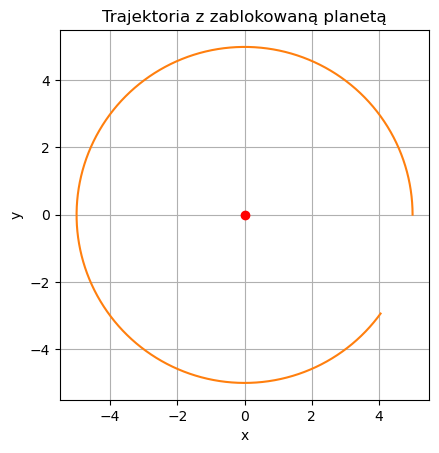

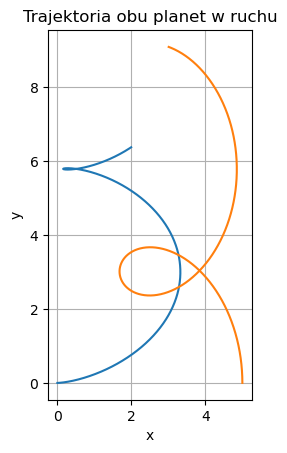

In [3]:
R = 5
m1 = 1e5
G = 1
errors = []

plt.plot(0, 0, '-ro')
plt.title("Trajektoria z zablokowaną planetą")
plt.xlabel('x')
plt.ylabel('y')
a = n_body(1e-4, 2000, [Planet(m1, 0, 0, 0, 0), Planet(m1, R, 0, 0, np.sqrt(m1/R))], True, True)
plt.title("Trajektoria obu planet w ruchu")
plt.xlabel('x')
plt.ylabel('y')
a = n_body(1e-4, 1100, [Planet(m1, 0, 0, 0, 0), Planet(m1, R, 0, 0, np.sqrt(m1/R))], True, False)

## Zadanie 1 - Wielkość kroku czasowego a błędy w trajektorii

Poniższy kod realizuje scenariusz, w którym jedno ciało jest nieruchome, a drugie porusza się na orbicie kołowej wokół pierwszego. Aby sprawdzić jak wielkość kroku czasowego wpływa na dokładność kolejnego wyznaczania współrzędnych wykorzystuję:
$$e = |R - |\bar{x_1} - \bar{x_2}||$$

Przy idealnej sytuacji promień po którym porusza się drugie ciało powinien być stały. Miara $e$ wyznacza o ile w symulacji końcowy promień różni się od początkowego. Symulację wykonuję na 6 wariantach wartości kroku czasowego w zakresie [$10^{-2}, 10^{-7}$]. Przy zmniejszeniu kroku czasowego zwiększam ich ilość, tak aby każda symulacja wykonała taki sam postęp.

In [4]:
errors = []
step_sizes = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

for s in step_sizes:
    n_body(s, int(10/s), [Planet(m1, 0, 0, 0, 0), Planet(m1, R, 0, 0, np.sqrt(m1/R))], False, True)

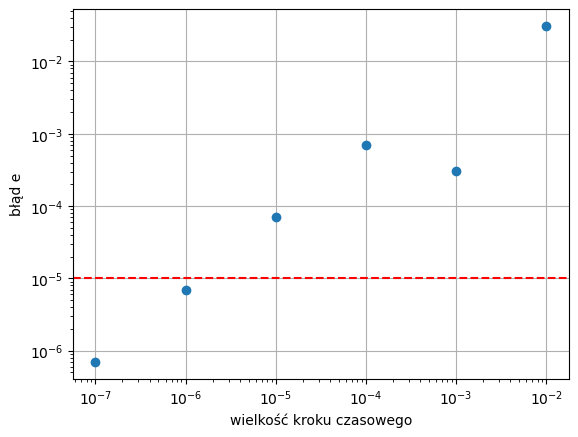

In [5]:
plt.plot(step_sizes, errors, 'o')
plt.axhline(y=1e-5, color='r', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('wielkość kroku czasowego')
plt.ylabel('błąd e')
plt.grid(True)
plt.show()

In [6]:
errors[4]/errors[5]

10.00012910716969

Powyższy wykres przedstawia zależność błędu *e* od wielkości korku czasowego w podwójnej skali logarytmicznej. Odrzucając dwie pierwsze wartości wykres układa się w liniową zależność, gdzie 10-krotny spadek kroku czasowego powowuje także 10-krotny spadek błędu. Ze sprawdzonych wartości $dt = 10^{-6}$ było pierwszą, przy której błąd był mniejszy niż wspomniane w treści zadania $10^{-5}$.

## Zadanie 2 - Ruch dwóch ciał po elipsie
Przy założeniu $\bar{x}_1 = (0,0)$, $\bar{x}_2 = (1,0)$, $\bar{v}_1 = (0,-v)$, $\bar{v}_2 = (0,v)$, $m_1 = m_2 = 1$ i odpowiednio zadanym *v* oba ciała będą się poruszały po symetrycznych elipsach. Zapisuję przebieg 10 symulacji dla *v* w zakresie [$0.1$,$1.0$]. Ilość korków czasowych dobieram tak aby ciało wykonało jedną elipsę.

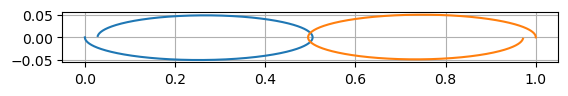

In [11]:
data = []

data.append(n_body(1e-6, 1500000, [Planet(1, 0, 0, 0, -0.1),Planet(1, 1, 0, 0, 0.1)], True, False))

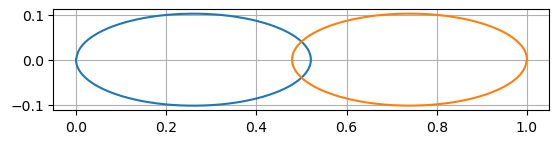

In [12]:
data.append(n_body(1e-6, 1650000, [Planet(1, 0, 0, 0, -0.2),Planet(1, 1, 0, 0, 0.2)], True))

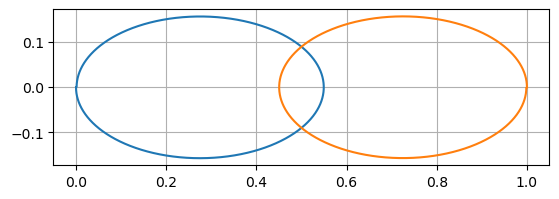

In [13]:
data.append(n_body(1e-5, 180000, [Planet(1, 0, 0, 0, -0.3),Planet(1, 1, 0, 0, 0.3)], True))

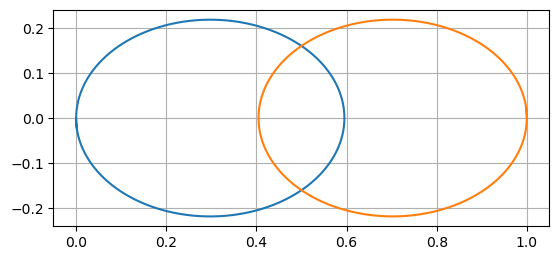

In [14]:
data.append(n_body(1e-5, 210000, [Planet(1, 0, 0, 0, -0.4),Planet(1, 1, 0, 0, 0.4)], True))

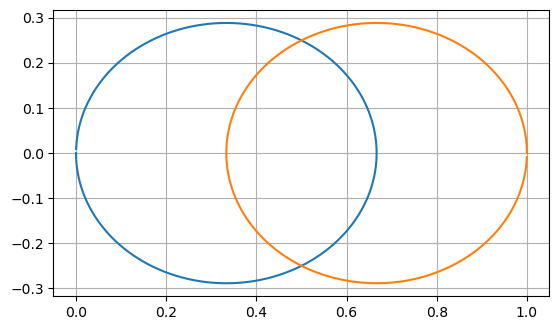

In [15]:
data.append(n_body(1e-5, 240000, [Planet(1, 0, 0, 0, -0.5),Planet(1, 1, 0, 0, 0.5)], True))

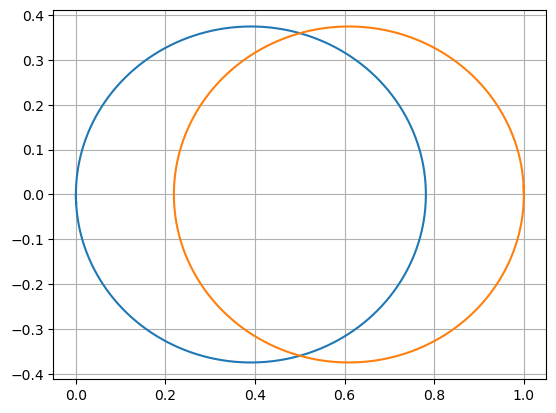

In [16]:
data.append(n_body(1e-5, 310000, [Planet(1, 0, 0, 0, -0.6),Planet(1, 1, 0, 0, 0.6)], True))

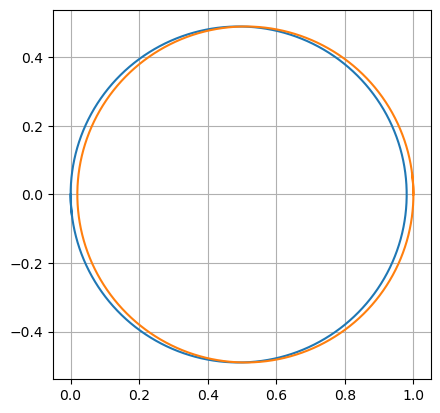

In [17]:
data.append(n_body(1e-5, 440000, [Planet(1, 0, 0, 0, -0.7),Planet(1, 1, 0, 0, 0.7)], True))

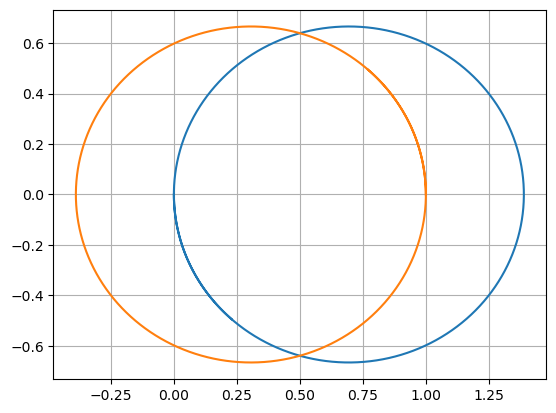

In [18]:
data.append(n_body(1e-5, 800000, [Planet(1, 0, 0, 0, -0.8),Planet(1, 1, 0, 0, 0.8)], True))

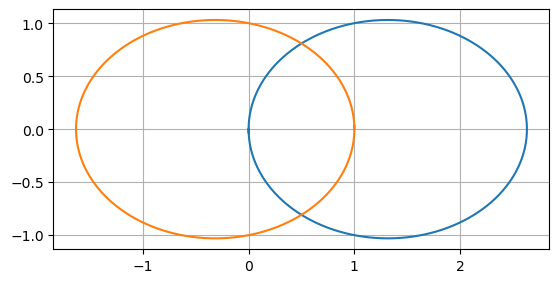

In [19]:
data.append(n_body(1e-5, 1900000, [Planet(1, 0, 0, 0, -0.9),Planet(1, 1, 0, 0, 0.9)], True))

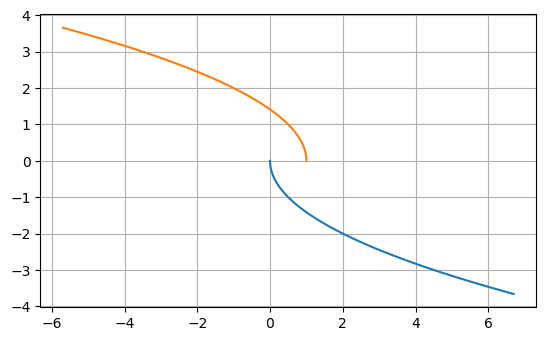

In [20]:
data.append(n_body(1e-5, 2000000, [Planet(1, 0, 0, 0, -1.0),Planet(1, 1, 0, 0, 1.0)], True))

Przy $v=1.0$ ciała przestają tworzyć eliptyczne orbity. Wykorzystując dane z powyższych symulacji rysuję wykres zależności stosunku małej i dużej średnicy elipsy od prędkości *v*.

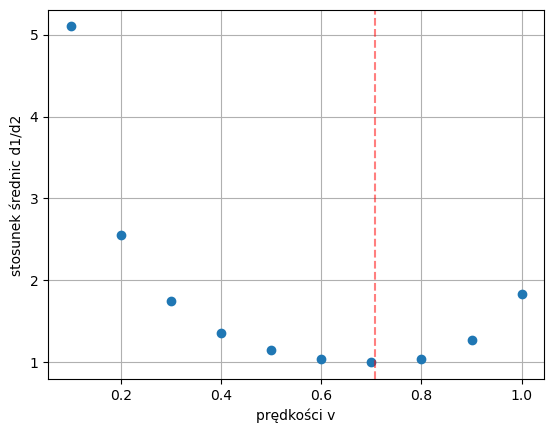

In [21]:
d_ratios = []
vs = np.linspace(0.1, 1.0, 10)

for i in range(len(data)):
    d_ratios.append( (np.max( data[i][0][0] )-np.min( data[i][0][0] )) / (np.max( data[i][1][0] )-np.min( data[i][1][0])) )
    
plt.plot(vs, d_ratios, 'o')
plt.axvline(np.sqrt(1/2), c='red', linestyle='--', alpha=0.5)
plt.xlabel("prędkości v")
plt.ylabel("stosunek średnic d1/d2")
plt.grid(True)
plt.show()

Wraz ze zmniejszaniem wartości $d_1/d_2$, elipsa coraz bardziej przypomina okrąg, stosunek równy jeden oznacza dzielenie przez siebie średnicy koła. Czerwona kreskowana linia na wykresie reprezentuje wspomnianą w treści zadania prędkość $v=\sqrt{\frac{m_2^2}{m_1 + m_2}}$, czyli w tym konkretnym przypadku $\sqrt{0.5}$. Przy tej wartości teoretycznie znajduje się minimum funkcji z wykresu równe precyzyjnie 1, poniżej rysunek tego przypadku:

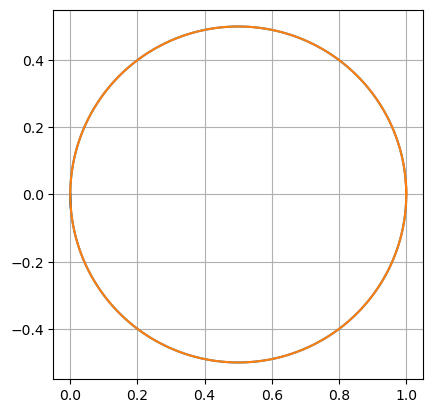

In [22]:
new_data = n_body(1e-6, 4500000, [Planet(1, 0, 0, 0, -np.sqrt(1/2)),Planet(1, 1, 0, 0, np.sqrt(1/2))], True)

In [23]:
print(f"d1/d2 = {(np.max( new_data[0][0] )-np.min( new_data[0][0] )) / (np.max( new_data[1][0] )-np.min( new_data[1][0]))}")

d1/d2 = 1.0000016660849484


Przy kroku czasowym $dt=10^{-6}$ udało się uzyskać stosunek średnic równy 1 z dokładnością do 5. miejsca po przecinku.

## Zadanie 3 - Analiza ruchu 3 ciał

### Przypadek z siłą grawitacji

Funkcja z początku notatnika zadziała także dla przypadku 3 ciał. Parametry ostatniej symulacji to $\bar{x}_1 = (3.4722222222222197, 4.555555555555556)$, $\bar{x}_2 = (1.3749999999999982, -2.847222222222224)$, $\bar{x}_3 = (-4.819444444444439, -1.7777777777777795)$, $\bar{v}_1 = \bar{v}_2 = \bar{v}_2 = (0,0)$, $m_1 = m_2 = m_3 = 10$

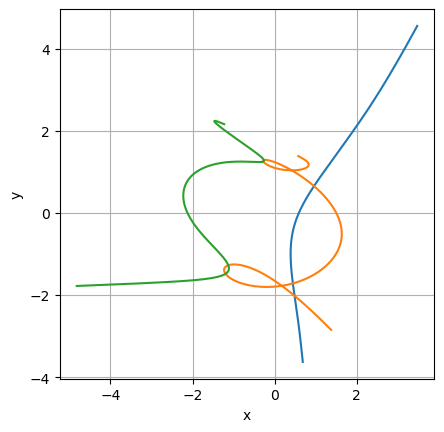

In [24]:
p1 = Planet(10, 3.4722222222222197, 4.555555555555556, 0, 0)
p2 = Planet(10, 1.3749999999999982, -2.847222222222224, 0 , 0)
p3 = Planet(10, -4.819444444444439, -1.7777777777777795, 0 , 0)
ps=[p1,p2,p3]

plt.xlabel('x')
plt.ylabel('y')
data3 = n_body(1e-5, 800000, ps, plot_flag=True, fixed_flag=False, return_v_flag=True)

Drugie i trzecie ciało dwa rady pokonały "pętlę" wokół siebie, co będzie miało znaczenie dla późniejszej analizy. Wykres prędkości:

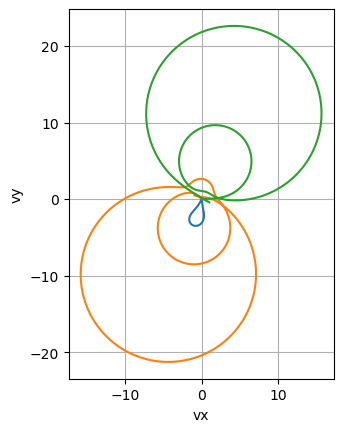

In [25]:
plt.plot(data3[2][0], data3[3][0])
plt.plot(data3[2][1], data3[3][1])
plt.plot(data3[2][2], data3[3][2])
plt.gca().set_aspect('equal', adjustable='box') # proporcje 1:1 przy rysowaniu trajektorii
plt.xlabel('vx')
plt.ylabel('vy')
plt.grid(True)
plt.show()

W celu utworzenia macierzy *R* zredukuję wektory położenia i prędkości z 800000 elementów na 800 elementów zachowując co tysięczny krok. Kolejne elementy macierzy są zdefiniowane jako: 
$$R_{ij} = |s_i - s_j|$$
gdzie *s* to wektor stanu przechowujący informację o położeniach i prędkościach w obu osiach dla wszystkich trzech ciał.

In [26]:
for i in range(len(data3)):
    for j in range(len(data3[i])):
        data3[i][j] = data3[i][j][:800000:1000]
        
R = np.ones((800,800))

for i in range(len(R)):
    state1 = np.array([data3[0][0][i], data3[1][0][i], data3[2][0][i], data3[3][0][i],
                data3[0][1][i], data3[1][1][i], data3[2][1][i], data3[3][1][i],
                 data3[0][2][i], data3[1][2][i], data3[2][2][i], data3[3][2][i]])
    for j in range(len(R)):
        state2 = np.array([data3[0][0][j], data3[1][0][j], data3[2][0][j], data3[3][0][j],
                    data3[0][1][j], data3[1][1][j], data3[2][1][j], data3[3][1][j],
                     data3[0][2][j], data3[1][2][j], data3[2][2][j], data3[3][2][j]])
        R[i][j] = np.linalg.norm(state1 - state2)

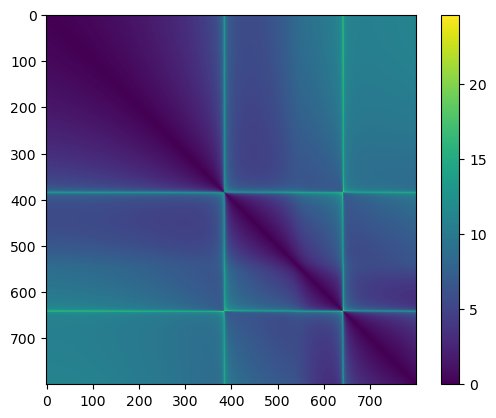

In [27]:
plt.imshow(R)
plt.colorbar()
plt.show()

Na wykresie widać dwa wyróżniające się momenty symulacji, w około 390. i 640. kroku. Prawdopodobnie reprezentują one "pętle" wspomniane przy wykresie trajektorii. Wówczas na przestrzeni kilkudziesięciu, być może kilkuset, kroków prędkość i położenie zmieniały się o wiele szybciej z kroku na krok niż miało to miejsce w innych momentach symulacji. 